In [2]:
import sys
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install tweet-preprocessor

  Using cached https://files.pythonhosted.org/packages/5e/82/c0de5839d613b82bddd088599ac0bbfbbbcbd8ca470680658352d2c435bd/scikit_learn-0.20.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/c1/e2/4db8df8f6cddc98e7d7c537245ef2f4e41a1ed17bf0c3177ab3cc6beac7f/numpy-1.16.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/7f/5f/c48860704092933bf1c4c1574a8de1ffd16bf4fde8bab190d747598844b2/scipy-1.2.1-cp36-cp36m-manylinux1_x86_64.whl


## Módulos

Cargando módulos

In [5]:
import stop_words
import preprocessor 
import matplotlib.pyplot as plt
import codecs
import json
import random
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans

## Cargar tweets

Cargar archivo de un archivo _ndjson_ (tweet json por línea) y los límpia

In [6]:
archivo_json="stream.ndjson"
preprocessor.set_options(preprocessor.OPT.URL, preprocessor.OPT.MENTION, preprocessor.OPT.NUMBER)

tweets=[]
with codecs.open(archivo_json,"r") as reader:
    for line in reader:
        try:
            tweet=json.loads(line)
        except json.JSONDecodeError:
            continue
        if 'extended_tweet' in tweet:
            text=preprocessor.clean(tweet['extended_tweet']['full_text'])
        else:
            text=preprocessor.clean(tweet['text'])
        tweets.append(text.lower())

## Total de tweets

Contando los tuits y desplegnado 10 de forma aleatoria

In [7]:
print("Total de tweets",len(tweets))
for i in range(10):
    print(i+1,random.choice(tweets))

Total de tweets 6579
1 estiman en % aprobación de amlo, unos puntos menos que a principios de año
2 rt : yo voy #alascalles5mayo para exigir que amlo cumpla la ley, para coadyuvar a que asuma sus responsabilidades como repre…
3 gracias tío amlo!!
4 gobierno de amlo anuncia la legalización de drogas en méxico #noticias
5 rt : ¿eres chairo y proamlo? 🇲🇽🧓repórtate con un rt y fav. estamos creando entre todos los chairos la #redamlove una red que sirve…
6 rt : #twitternocensuresaméxico a menos que sea un chayotero que cuestione las ideas de nuestro amado lider amlo. ahí si, aplaudi…
7 la jornada: amlo corrige a hacienda: no hay subejercicio, son ahorros
8 rt : aquí está una parte del video donde amlo no está borracho dirigiéndose al país para decirles que su gobierno no utiliz…
9 rt : mexican president amlo has just announced that his government will legalize drugs and utilize the money which was previou…
10 ya expresa cosas tangibles no pura palabrería amlo,estás muy mal


## Eliminado duplicados exactos

Elminando los duplicados y contando los únicos

In [8]:
tweets=Counter(tweets)
print("Tweets duplicated")
for t,v in tweets.most_common(10):
    print(v,t)
print("Total de unique tweets",len(tweets))
tweets=list(tweets.keys())

Tweets duplicated
162 rt : me acaba de decir un vecino que si necesito dinero me meta de “bot” contra amlo. que pagan pesos a la semana...
132 rt : aquí está una parte del video donde amlo no está borracho dirigiéndose al país para decirles que su gobierno no utiliz…
132 rt : preocupante la tendencia de twitter de censurar cuentas de usuarios que manifiestan posiciones a favor del nuevo gobier…
104 rt : mexican president amlo has just announced that his government will legalize drugs and utilize the money which was previou…
88 rt : ¿hay algo bueno en amlo? por supuesto. es un hombre honesto y sin inclinación por los lujos. ojalá aceptara ser presid…
81 rt : youtubers rompen récord en twitter, se colocó el #jalifeenvivo en primer lugar nacional y a nivel mundial. #tómala 😎 htt…
77 rt : ¿sabían que amlo al revés es olma? no significa nada, es información inútil, así como todo lo que dice andrés manuel en sus…
74 rt : y mientras tanto en méxico 👍
70 rt : ¿se acuerdan cómo creció el país c

## Preparando para procesado de text

Preparando los _stopwords_ y vectorizando los tuits

In [9]:
stopwords = stop_words.get_stop_words('es')
stopwords.append("rt")
stopwords.append("amlo")

In [10]:
vectorizer = TfidfVectorizer(min_df=3, stop_words=stopwords)
tfidf = vectorizer.fit_transform(tweets)
print('Matrix documento término: ' + str(tfidf.shape))

Matrix documento término: (2610, 1988)


## Preparando los clusters

Se crea objeto KMeans

In [11]:
k_cluster= KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=1)
k_predicted=k_cluster.fit(tfidf)
labels=k_predicted.labels_

## Proyectando los vectores

Los tuits vectores se proyectan a dos dimensiones

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(tfidf.todense())

## Haciendo gráfica

Dibujando los vectores

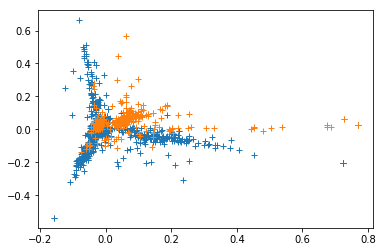

In [13]:
classes=np.unique(labels)
x=[]
y=[]
for l in classes:
    x.append(principalComponents[labels==l][:,0])
    y.append(principalComponents[labels==l][:,1])
    plt.plot(x[-1],y[-1],'+')
plt.show()

In [14]:
for l in classes:
    idx=np.argwhere(labels==l)
    idx=[int(x) for x in idx]
    print("Muestra de diez tweets en cluster", l, "de ",len(idx)," twits" )
    for _ in range(10):
        print("  ",tweets[random.choice(idx)])
    print()

Muestra de diez tweets en cluster 0 de  2259  twits
   imposible es poco, el senil napoleónico está comprando carbón, construyendo refinerías y destruyendo selva, gobierno de hipocresía mentiras y alzheimer
   rt : #marchamayo5 contras las políticas de #amlo te interesa saber dónde se llevarán a cabo las manifestaciones contra …
   rt : su nivel de protagonismo, soberbia y altanería es soberbio estimada prime…
   rt : que vergüenza tan grandote y tan chismoso cuál familiar de amlo?
   rt : ¿algún mexicano 🇲🇽 ya se pronunció sobre el hecho de que este video de amlo ya no está disponible?
   ....tiemblen ladrones......!!!!!
   rt : y también censuran a lps críticos de amlo .. ejemplo maite valiente 🇲🇽 (): con otra cue…
   a favooor! 🙋‍♀️
   #presidencial | amlo afirma que buscará opciones de compra en el extranjero para satisfacer la demanda de las medicinas para enfermos con vih
   otra ruta clientelar e ideológica de amlo. en el número de la mochila política, héctor moreno explica como

## Calculando tópics

Primero vectorizamos y luego hacemos el cálculo

In [15]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

vectorizer = TfidfVectorizer(min_df=3, stop_words=stopwords)
tf = vectorizer.fit_transform(tweets)
print('Matrix documento término: ' + str(tf.shape))

lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tfidf)



Matrix documento término: (2610, 1988)


In [17]:
feature_names = vectorizer.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print("Topic %d:" % (topic_idx))
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

Topic 0:
morena diputados pagan meta posible ganas mismos opinión migrantes autogol
Topic 1:
si solo presidente twitter gobierno así ustedes ahora dice hace
Topic 2:
vih país seguridad ley empresa mientras compra wallace paz autoriza
Topic 3:
gobierno méxico ja legalización drogas anuncia ojalá veo mejor gente
Topic 4:
gobierno presidente crecimiento pro manuel andrés twitternocensuresaméxico obrador apoyo méxico
Topic 5:
amlorenuncia corrupción internet si puedes dicho amloelfracasopresidencial madre honesto creo
Topic 6:
datos noalacensuratwitter subejercicio candidato maduro ahorros amlolafuerzademéxico pena relación críticas
Topic 7:
plan si desarrollo méxico ser redes años millones sociales libertad
Topic 8:
si jalife alfredo hoy nacional carlos méxico palacio conferencia payán
Topic 9:
dice va viendo vivir jueces bueno guardia conservadores fifís cantaleta


## Ejemplos LDA

Primero calculamos labels para el tópico más probable por tuit y luego se reduce la dimension usando _t-sne_

In [22]:
classes=np.unique(labels)
for l in classes:
    idx=np.argwhere(labels==l)
    idx=[int(x) for x in idx]
    print("Muestra de dos tweets en cluster", l, "de ",len(idx)," twits" )
    for _ in range(2):
        print("  --",tweets[random.choice(idx)])
    print()

Muestra de dos tweets en cluster 0 de  192  twits
  -- gestión de gobierno sheinbaum vs. amlo
  -- pásame el contacto no hay trabajo, gracias al pendejazo de lópez, sirve que me desquitó con ganas y me pagan...

Muestra de dos tweets en cluster 1 de  591  twits
  -- mi querida roana, los fachos siempre van a enfrentar al presidente.lo llevan en su adn político, las ideas progresistas de amlo son totalmente lo contrario a lo que ellos defienden... y como se termino el chayote están rabiosos, pierden su oportunidad de seguir robando y de 👇
  -- pues es que resulta que amlo viene del pri, partido político que aborrece medio país... pero ¿qué crees? casualmente a la gente se le olvidó y pasa desapercibido el que reclute personajes "corruptos". entonces, ¿qué saldrá a la luz? que amlo = corrupción, igual que lo criticado🙄

Muestra de dos tweets en cluster 2 de  117  twits
  -- ▶📹[video] | #amlo pide a farmacéuticas "no jugar a las vencidas
  -- el amlo por su pinche necedad de querer gobern